In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns; sns.set(style='whitegrid')

## Load data

In [2]:
train = pd.read_csv('./train_1.csv')
# key = pd.read_csv('./key_1.csv')
# sub = pd.read_csv('./sample_submission_1.csv')

In [3]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [4]:
names = np.array([['_'.join(i.split('_')[:-3])] + i.split('_')[-3:] for i in train.Page.values])

## Draw some distributions

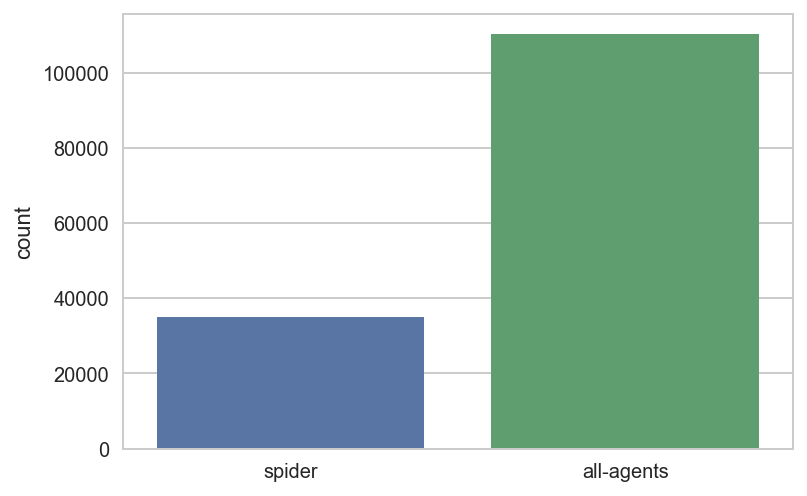

In [5]:
sns.countplot(names[:, 3]);

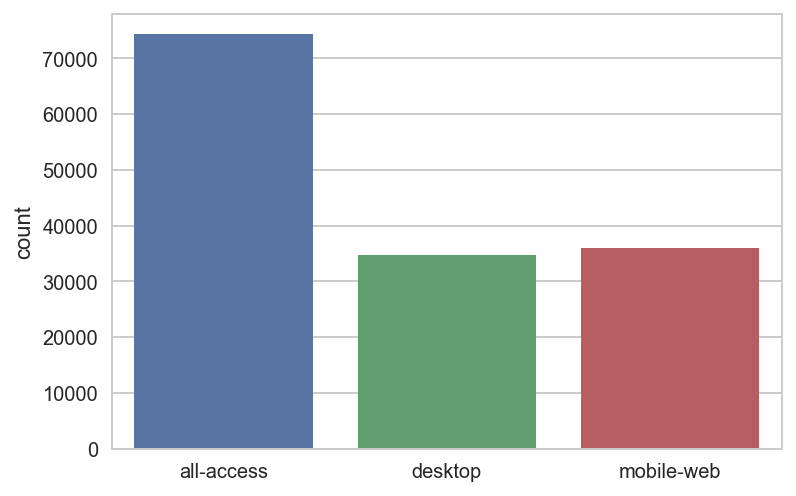

In [6]:
sns.countplot(names[:, 2]);

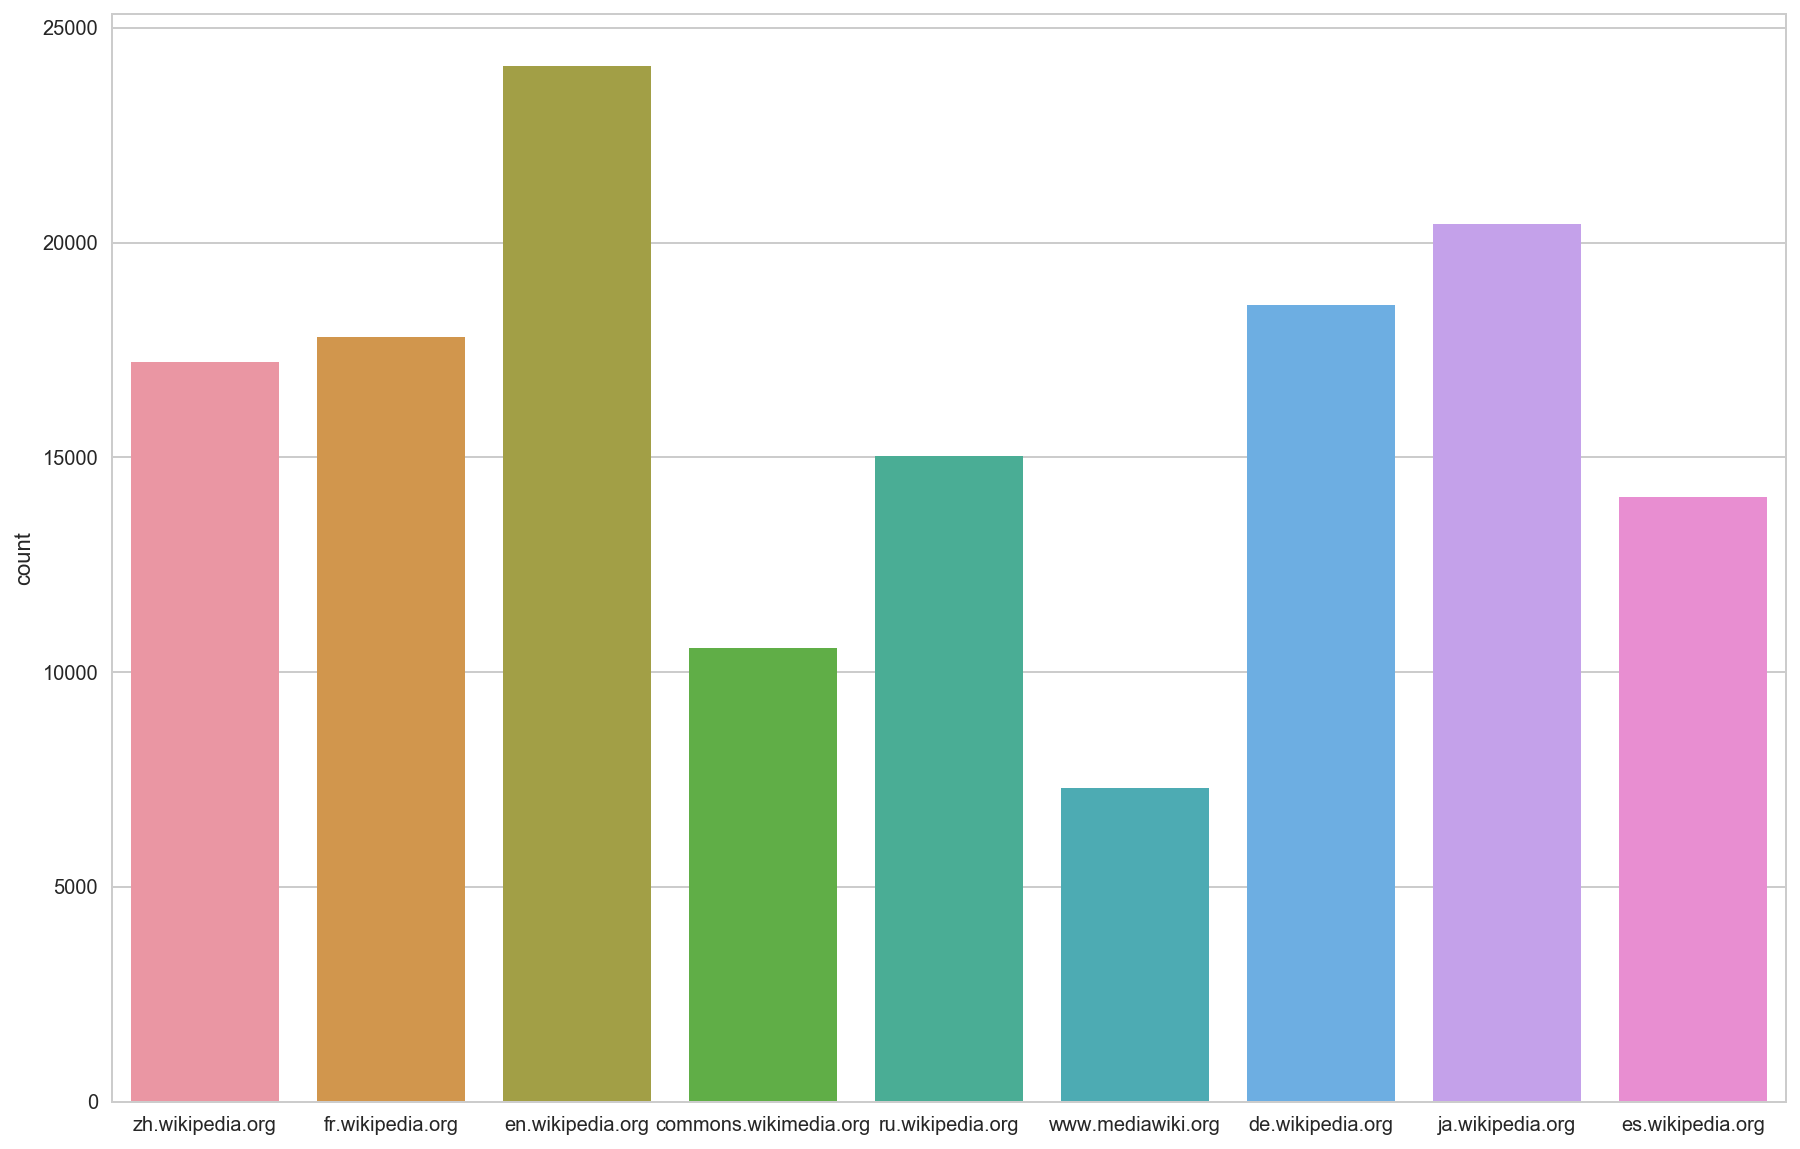

In [7]:
plt.figure(figsize=(15, 10))
sns.countplot(names[:, 1]);

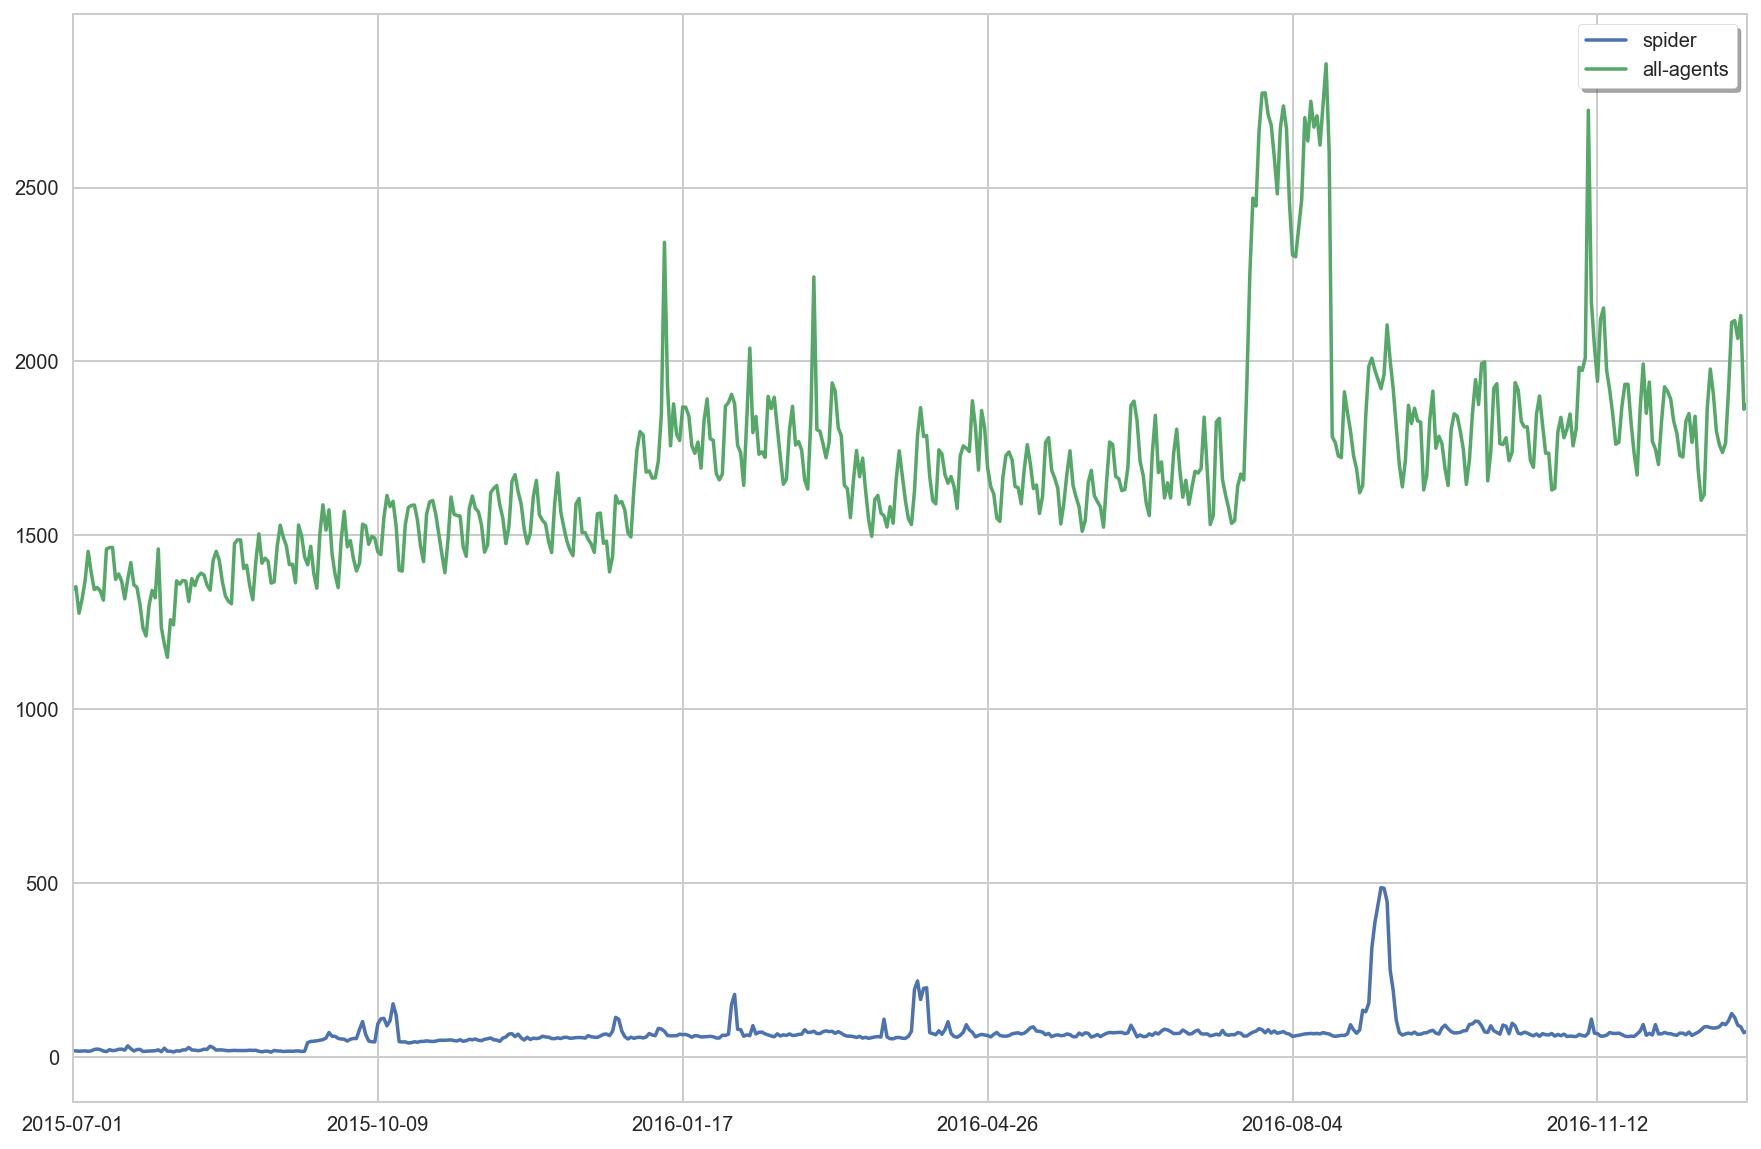

In [9]:
plt.figure(figsize=(15, 10))
for l in ['spider', 'all-agents']:
    train.iloc[[x.startswith(l) for x in names[:, 3]], 1:].fillna(0).mean(axis=0).plot(label=l)
plt.legend(loc=0, frameon=True, framealpha=1., shadow=True);

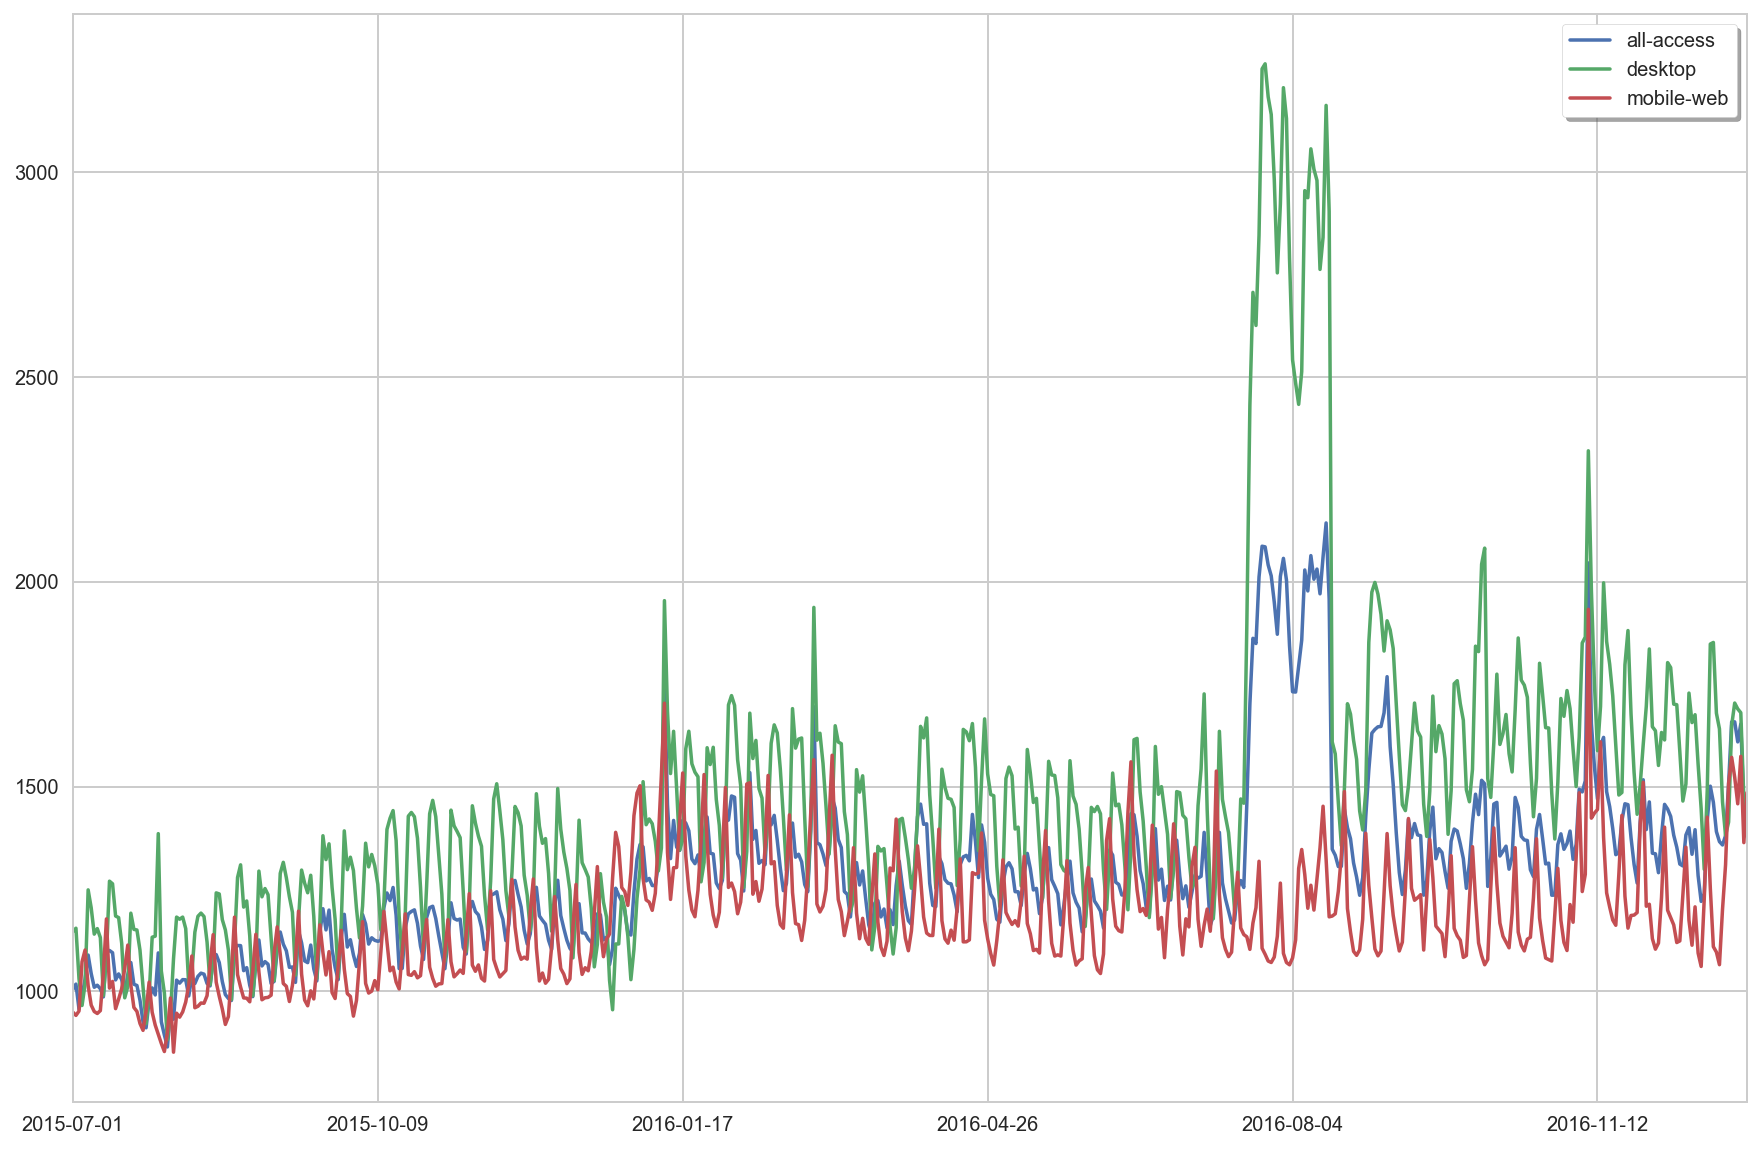

In [11]:
plt.figure(figsize=(15, 10))
for l in ['all-access', 'desktop', 'mobile-web']:
    train.iloc[[x.startswith(l) for x in names[:, 2]], 1:].fillna(0).mean(axis=0).plot(label=l)
plt.legend(loc=0, frameon=True, framealpha=1., shadow=True);

In [57]:
all_ag = train.iloc[[x.startswith('all') for x in names[:, 2]], 1:].fillna(0).sum(axis=0)
sum_all = (train.iloc[[x.startswith('mobile') for x in names[:, 2]], 1:].fillna(0).sum(axis=0) +
train.iloc[[x.startswith('desktop') for x in names[:, 2]], 1:].fillna(0).sum(axis=0))


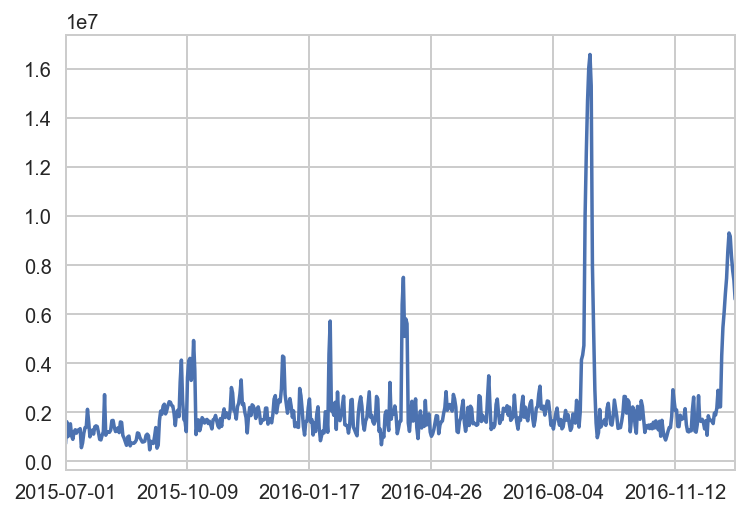

In [58]:
(all_ag - sum_all).plot()

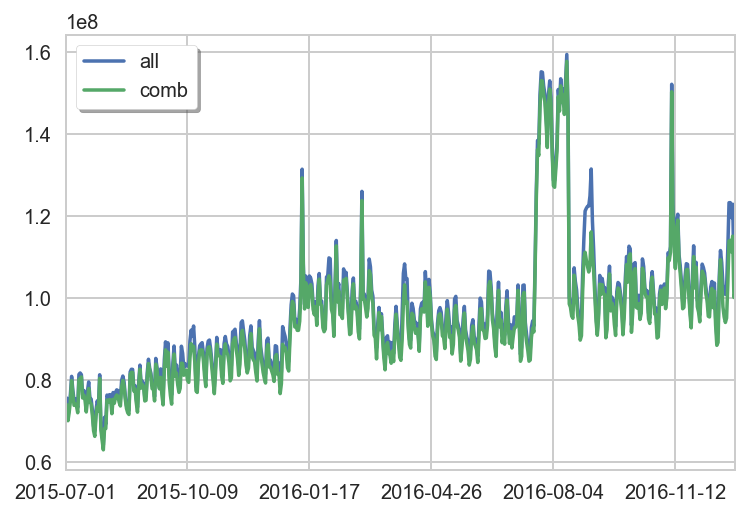

In [56]:
train.iloc[[x.startswith('all') for x in names[:, 2]], 1:].fillna(0).sum(axis=0).plot(label='all')
(train.iloc[[x.startswith('mobile') for x in names[:, 2]], 1:].fillna(0).sum(axis=0) +
train.iloc[[x.startswith('desktop') for x in names[:, 2]], 1:].fillna(0).sum(axis=0)).plot(label='comb')
plt.legend(loc=0, frameon=True, framealpha=1., shadow=True);


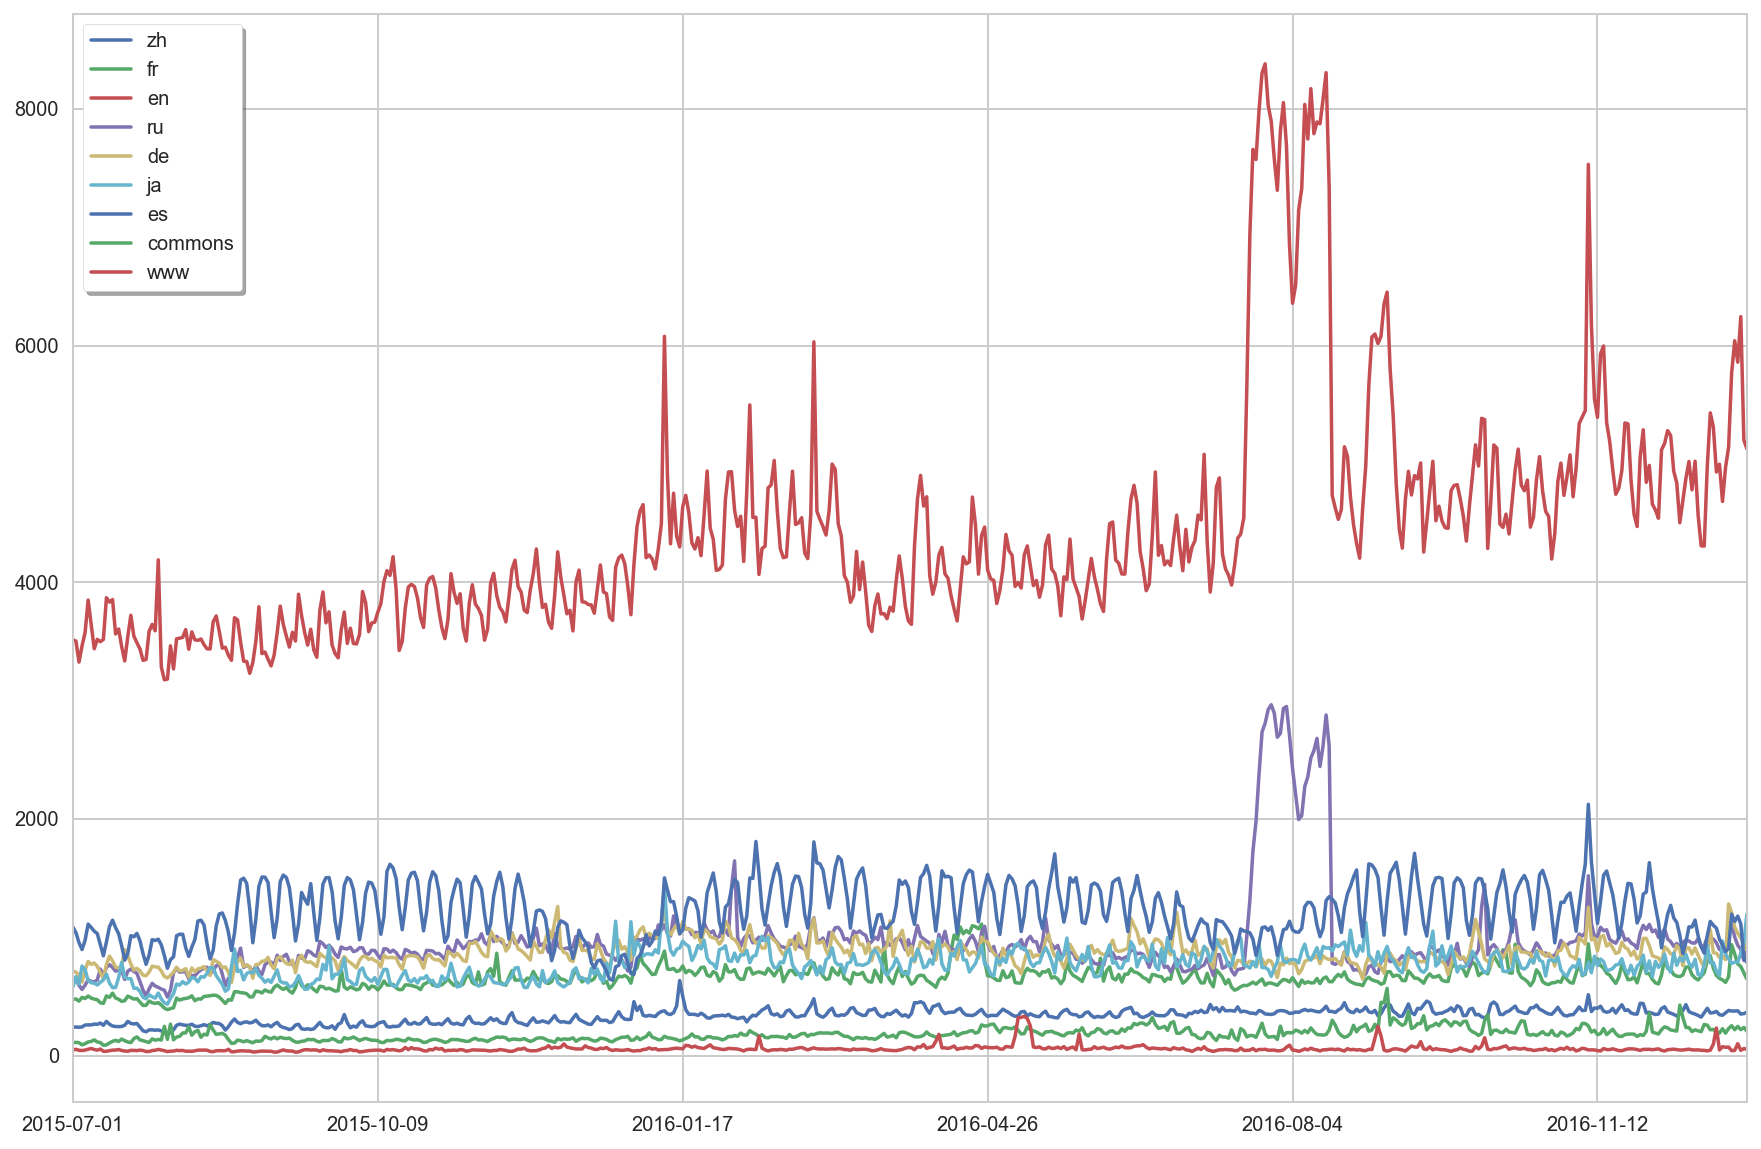

In [13]:
plt.figure(figsize=(15, 10))
for l in ['zh', 'fr', 'en', 'ru', 'de', 'ja', 'es', 'commons', 'www']:
    train.iloc[[x.startswith(l) for x in names[:, 1]], 1:].fillna(0).mean(axis=0).plot(label=l)
plt.legend(loc=0, frameon=True, framealpha=1., shadow=True);

In [14]:
train.shape

(145063, 551)

In [15]:
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 200.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.nanmean(diff)

In [16]:
data = train.iloc[:5000]

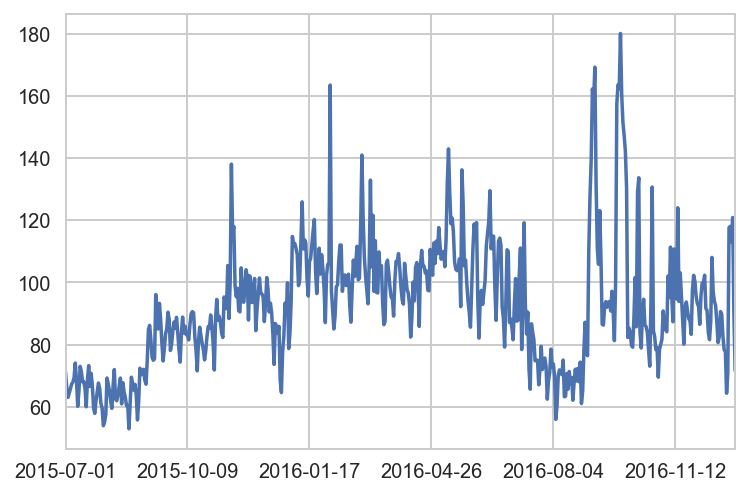

In [29]:
data[data.isnull().sum(axis=1) == 0].iloc[:, 1:].mean(axis=0).plot();

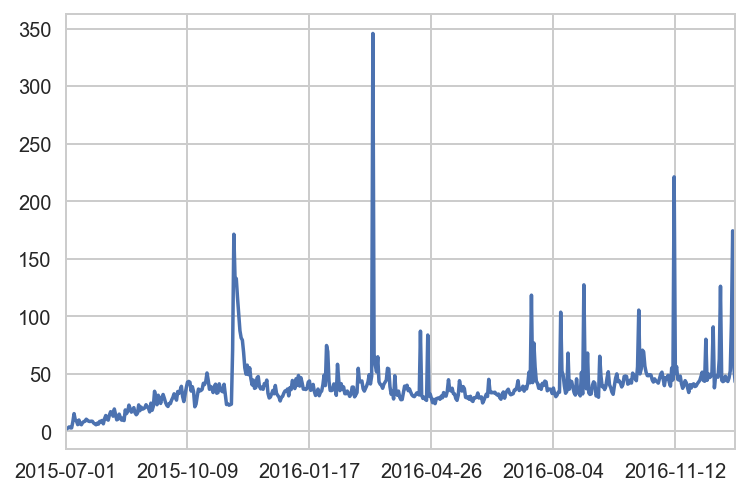

In [28]:
data[data.isnull().sum(axis=1) != 0].iloc[:, 1:].mean(axis=0).plot();

## Generate holdout dataset for model testing

In [31]:
counts = data.iloc[:, 1:]

In [49]:
holdout = data.iloc[:, 491:]

In [50]:
holdout.index = data.iloc[:, 0]

In [51]:
holdout.head()

,2016-11-02,2016-11-03,2016-11-04,2016-11-05,2016-11-06,2016-11-07,2016-11-08,2016-11-09,2016-11-10,2016-11-11,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
Page,,,,,,,,,,,,,,,,,,,,,
2NE1_zh.wikipedia.org_all-access_spider,18.0,25.0,14.0,20.0,8.0,67.0,13.0,41.0,10.0,21.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,26.0,11.0,21.0,14.0,14.0,54.0,5.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
3C_zh.wikipedia.org_all-access_spider,3.0,3.0,3.0,2.0,10.0,2.0,2.0,2.0,7.0,3.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
4minute_zh.wikipedia.org_all-access_spider,12.0,11.0,15.0,7.0,12.0,13.0,9.0,8.0,21.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5.0,6.0,33.0,13.0,10.0,22.0,11.0,8.0,4.0,10.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [52]:
training = data.iloc[:, 1:491]

In [53]:
training.index = data.iloc[:, 0]

In [54]:
training.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31,2016-11-01
Page,,,,,,,,,,,,,,,,,,,,,
2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,26.0,25.0,16.0,19.0,20.0,12.0,19.0,50.0,16.0,30.0
2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,25.0,19.0,15.0,21.0,21.0,27.0,33.0,15.0,24.0,13.0
3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,6.0,5.0,5.0,2.0,3.0,3.0,2.0,2.0,6.0,1.0
4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,9.0,13.0,21.0,13.0,10.0,21.0,15.0,103.0,22.0,15.0
52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,6.0,4.0,173.0,5.0,10.0,10.0,18.0,20.0,11.0


## Measure the performance of median predictor

In [107]:
medians = np.nan_to_num(np.nanmedian(training.iloc[:, -49:], axis=1))

/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


In [108]:
trues = holdout.values.flatten()

In [109]:
preds = (np.array([np.ones(holdout.shape[1])]) * np.array([medians]).T).flatten()

In [110]:
np.isnan(trues).sum()

4788

In [111]:
smape(np.nan_to_num(trues), preds)

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


46.624656879100691

Let's try to find the best number of days to calculate median from

In [115]:
x = []
y = []
for i in range(1, 100):
    medians = np.nan_to_num(np.nanmedian(training.iloc[:, -i:], axis=1))
    preds = (np.array([np.ones(holdout.shape[1])]) * np.array([medians]).T).flatten()
    y.append(smape(np.nan_to_num(trues), preds))
    x.append(i)

/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


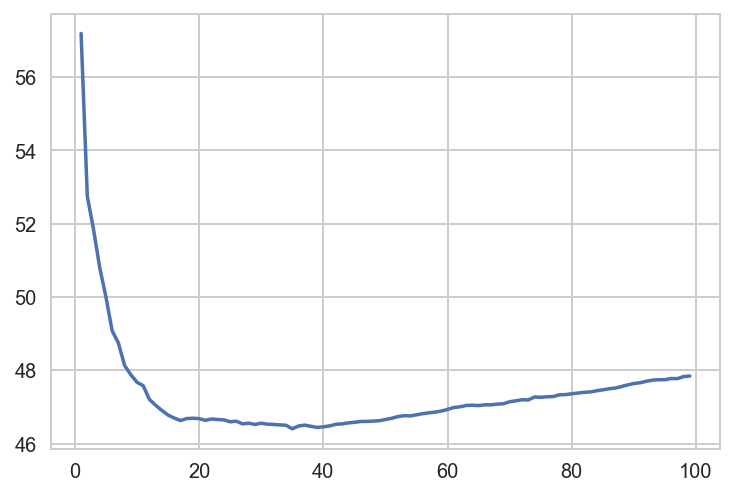

In [116]:
plt.plot(x, y)

In [119]:
np.argmin(y), x[np.argmin(y)]

(34, 35)

## Let's get our best median prediction for submission

In [120]:
key = pd.read_csv('./key_1.csv')

In [121]:
key.head()

,Page,Id
0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c
3,!vote_en.wikipedia.org_all-access_all-agents_2...,e98873359be6
4,!vote_en.wikipedia.org_all-access_all-agents_2...,fa012434263a


In [122]:
ids = key.Id.values
pages = key.Page.values

d_pages = {}
for id, page in zip(ids, pages):
    d_pages[id] = page[:-11]

pages = train.Page.values

In [123]:
sub = pd.read_csv('./sample_submission_1.csv')

In [124]:
visits = np.nan_to_num(np.round(np.nanmedian(train.drop('Page', axis=1).values[:, -35:], axis=1)))

d_visits = {}
for page, visits_number in zip(pages, visits):
    d_visits[page] = visits_number


ss_ids = sub.Id.values
ss_visits = sub.Visits.values

for i, ss_id in enumerate(ss_ids):
    ss_visits[i] = d_visits[d_pages[ss_id]]

print('Saving submission...')
subm = pd.DataFrame({'Id': ss_ids, 'Visits': ss_visits})
subm.to_csv('submission.csv', index=False)

/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


Saving submission...


In [125]:
subm.head()

,Id,Visits
0,bf4edcf969af,2
1,929ed2bf52b9,2
2,ff29d0f51d5c,2
3,e98873359be6,2
4,fa012434263a,2
